In [ ]:
from PIL import Image
from pylab import *
import pandas as pd

#### Reading all of the 10 images in python, resize each of them a 100 by 100 pixels format;

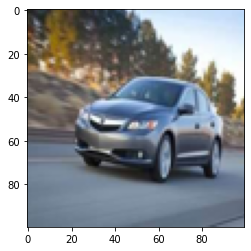

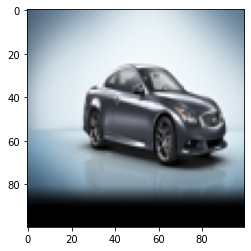

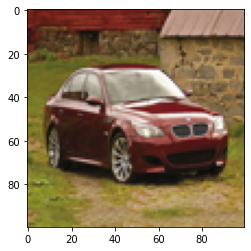

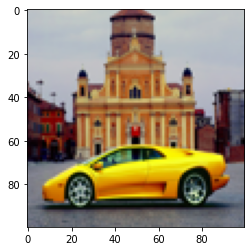

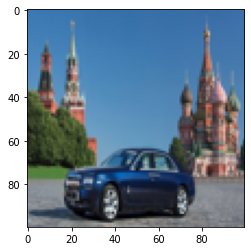

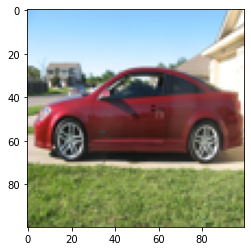

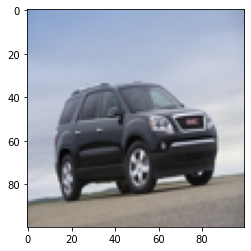

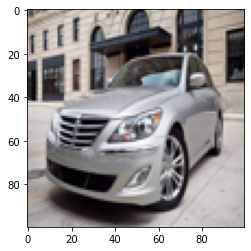

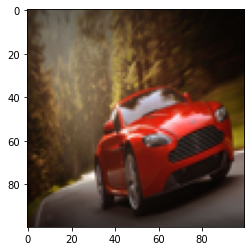

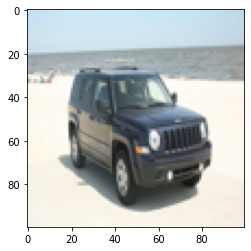

In [ ]:
image_list = []
image_array_list = []
newsize = (100, 100)
for filename in glob.iglob("IA2/image/*"): #assuming gif
    im1=Image.open(filename)
    im = im1.resize(newsize)
    image_list.append(im)
    im_m = array(im)
    image_array_list.append(im_m)

for i in range(10):
    fig, ax = plt.subplots(1, sharey = True)
    imshow(image_list[i])

#### Converting them to greyscale arrays (no color information needs to be kept, so the arrays will be 2‐D)

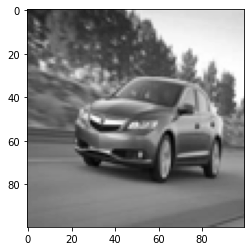

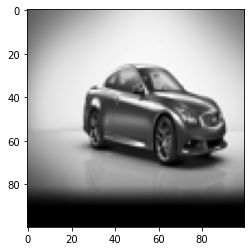

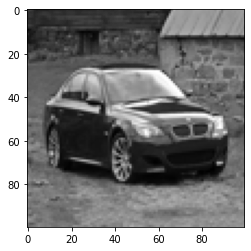

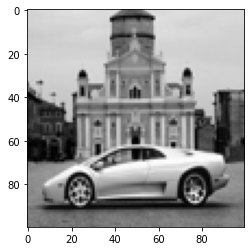

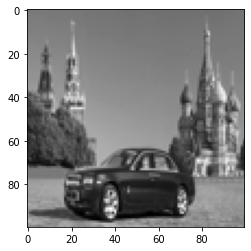

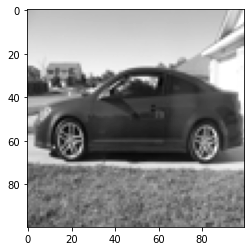

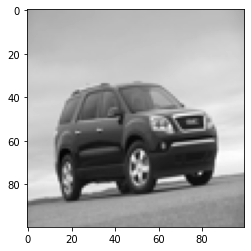

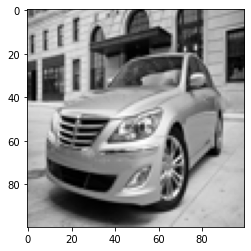

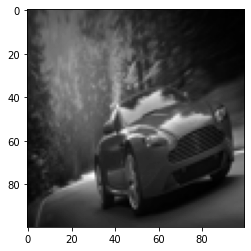

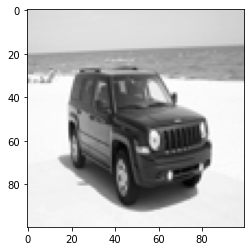

In [ ]:
im_gray_m_array_list = []
im_gray_m_list = []
for i in image_list:
    im_gray = i.convert('L') # L grascale - linear combination of RGB is converted to grascale
    #edges can be detected using convolution
    im_gray_m = array(im_gray)
    im_gray_m_list.append(im_gray)
    im_gray_m_array_list.append(im_gray_m)
    
for i in range(10):
    fig, ax = plt.subplots(1, sharey = True)
    imshow(im_gray_m_list[i],cmap = plt.cm.gray)

#### Flattening the 2‐D array to a 1‐D array (vectors), drawing a histogram to present the intensity value distribution of all of the images

<Figure size 432x288 with 0 Axes>

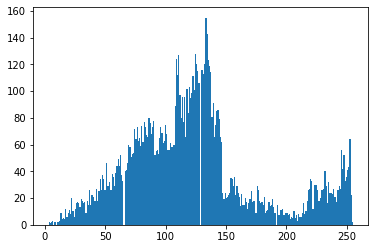

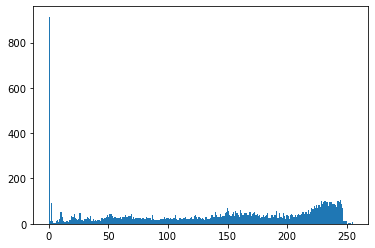

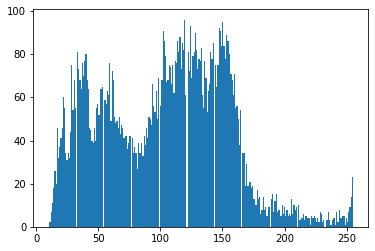

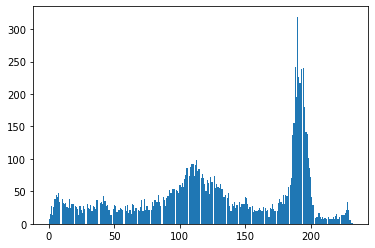

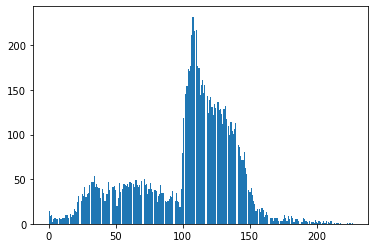

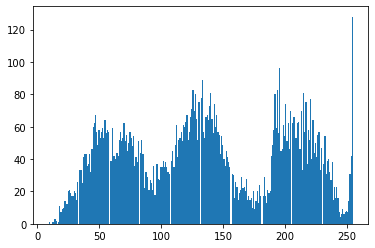

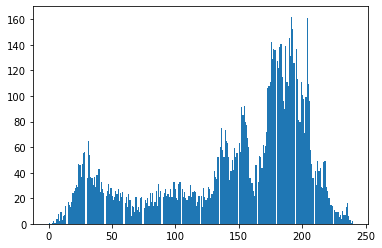

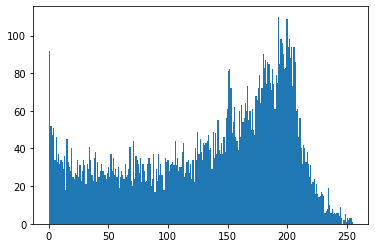

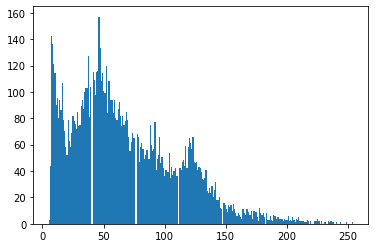

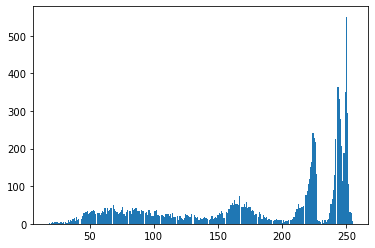

In [ ]:
figure()
#shape of the image is 2D
im_flattened = []
for i_gray in im_gray_m_array_list:
    fig, ax = plt.subplots(1, sharey = True)
    im_flattened.append(i_gray.flatten())
    hist_m = hist(i_gray.flatten(), 256)

#### Conducting histogram equalization to normalize the images and using histogram to present the intensity value distribution of all of the images after the normalization;

In [ ]:
i_norm_img_list = []
i_norm_img_array_list = []
for i_norm_img in im_gray_m_array_list:
    #fig, ax = plt.subplots(1, sharey = True)
    imhist, bins = histogram(i_norm_img.flatten(), 256, density=True)
    cdf = imhist.cumsum() # cummulative sum of the histogram
    cdf = 255 * cdf / cdf[-1] 
    # rescalling based on last element it should go from 0 to 1
    #incorporating rounding error
    im2 = interp(i_norm_img.flatten(), bins[:-1], cdf)
    i_norm_img_array_list.append(im2)
    #bins = 0:256 so remove one
    #mapping the cdf curve & then mapping it based on the histogram
    im_norm = im2.reshape(i_norm_img.shape)
    i_norm_img_list.append(im_norm)


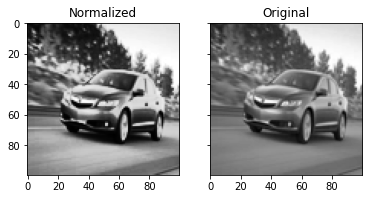

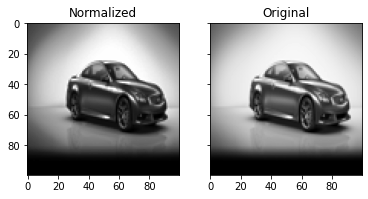

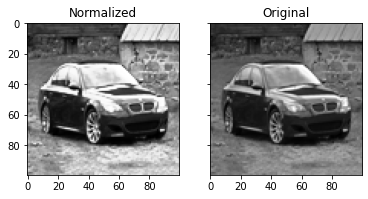

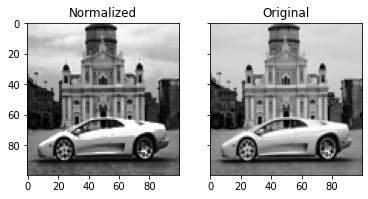

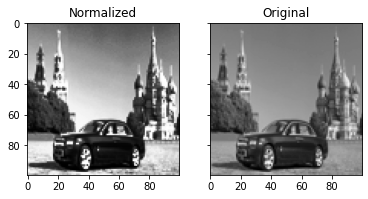

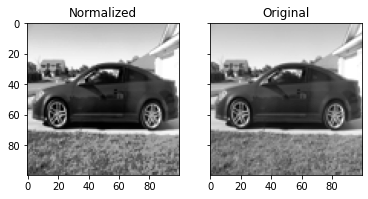

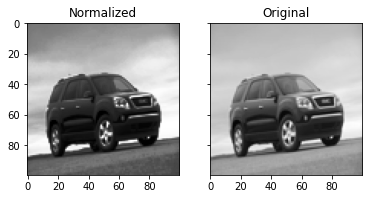

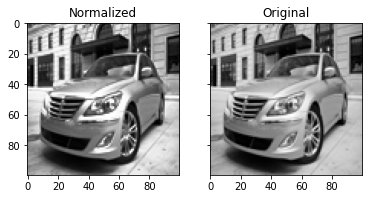

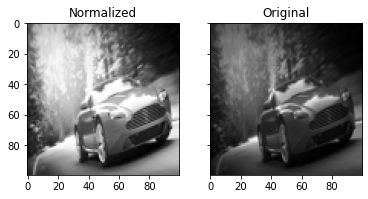

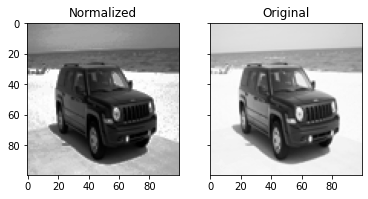

In [ ]:
for i in range(10):
    fig, ax = plt.subplots(1, 2, sharey = True)
    #for side by side plots
    ax[0].imshow(i_norm_img_list[i], cmap = 'gray')
    ax[1].imshow(im_gray_m_list[i], cmap = 'gray')
    ax[0].set_title('Normalized')
    ax[1].set_title('Original')
    fig.savefig("norm_pic.png")

#### Comparing the histogram in step 4 with step 3, to analyze the difference

<Figure size 432x288 with 0 Axes>

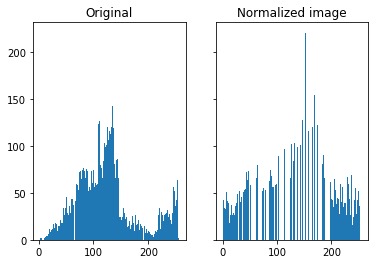

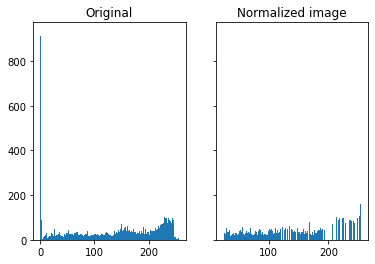

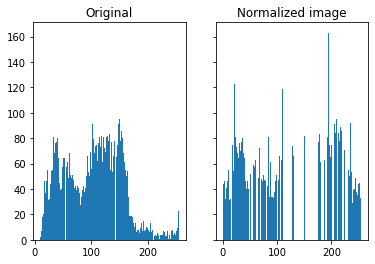

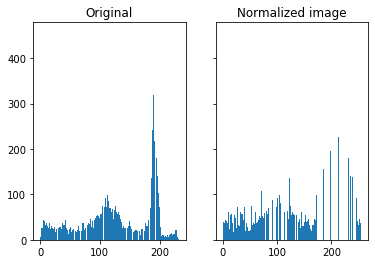

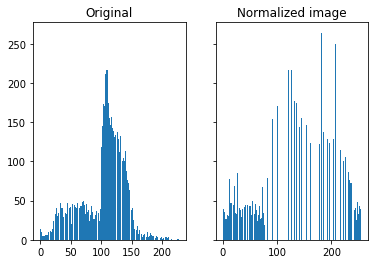

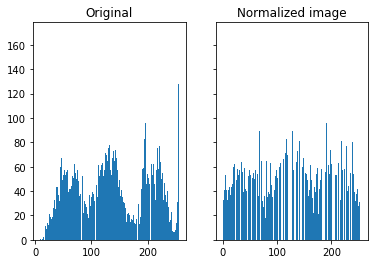

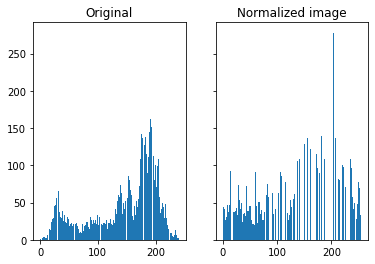

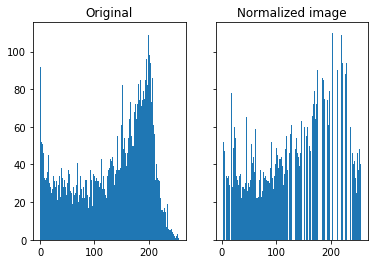

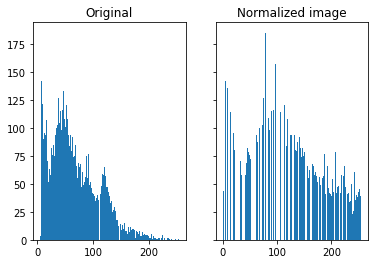

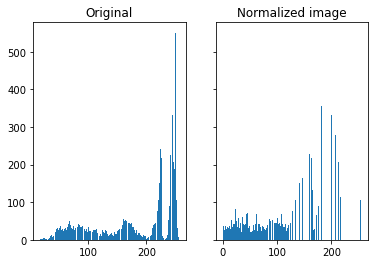

In [ ]:
figure()
for i in range(10):
    fig, ax = plt.subplots(1, 2, sharey = True)
    ax[0].set_title('Original')
    ax[1].set_title('Normalized image')
    ax[0].hist(im_gray_m_array_list[i].flatten(), 256)
    ax[1].hist(i_norm_img_array_list[i].flatten(),256)
    plt.savefig("norm_hists.png")

The histogram of the normalized images are more spread out, causing the images to be of high contrast

#### Saving flattened images in step 3 in a file 

In [ ]:
import csv
df = pd.DataFrame(im_flattened)
display(df)
df.to_csv("im_flattened_list.csv", encoding='utf-8', index=False)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,42,37,36,46,56,59,55,58,55,44,...,125,123,126,128,131,132,134,135,134,134
1,90,93,96,98,100,103,105,108,111,114,...,0,0,0,0,0,0,0,0,0,0
2,69,70,62,47,41,43,43,43,43,42,...,153,149,142,148,146,147,154,150,152,154
3,194,193,194,194,194,195,195,197,197,197,...,115,117,119,113,119,114,115,104,110,112
4,108,108,108,108,108,108,107,108,108,107,...,126,116,117,119,128,114,121,135,133,115
5,183,185,188,190,192,193,194,194,193,193,...,142,115,118,145,133,124,131,139,136,161
6,153,155,157,159,160,161,161,161,162,163,...,130,128,129,126,123,124,126,118,117,114
7,125,80,89,143,117,113,133,109,92,150,...,182,173,173,183,180,179,179,178,180,172
8,46,46,48,48,58,69,61,55,69,87,...,56,55,55,55,55,54,54,54,54,53
9,219,219,219,220,221,222,222,223,223,224,...,240,239,242,242,240,238,239,238,237,238
